In [2]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Import our own implementations
import importlib, OLS, prepare_data, polynomial_features
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from OLS import OLS_parameters

# Styling function
from Set_latex_params import set_mpl_latex_style
set_mpl_latex_style()


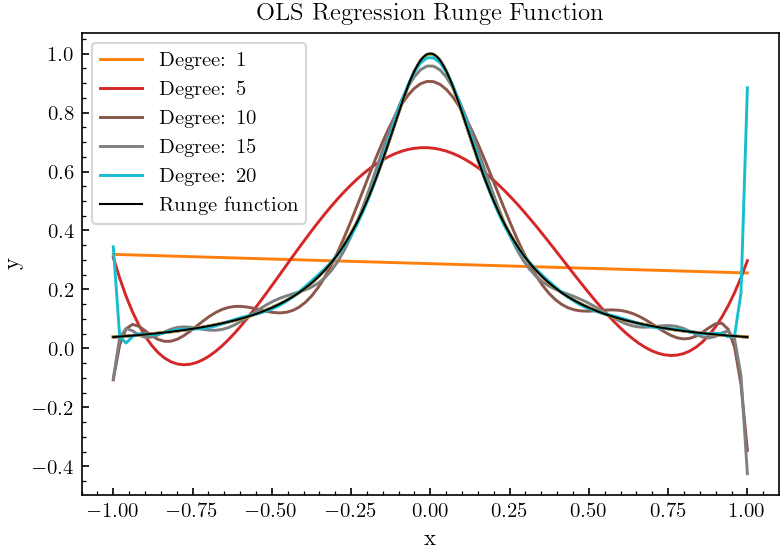

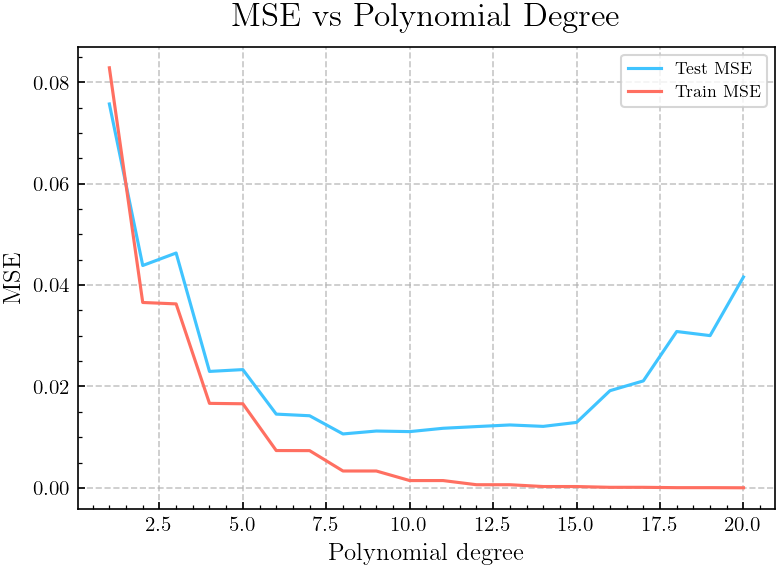

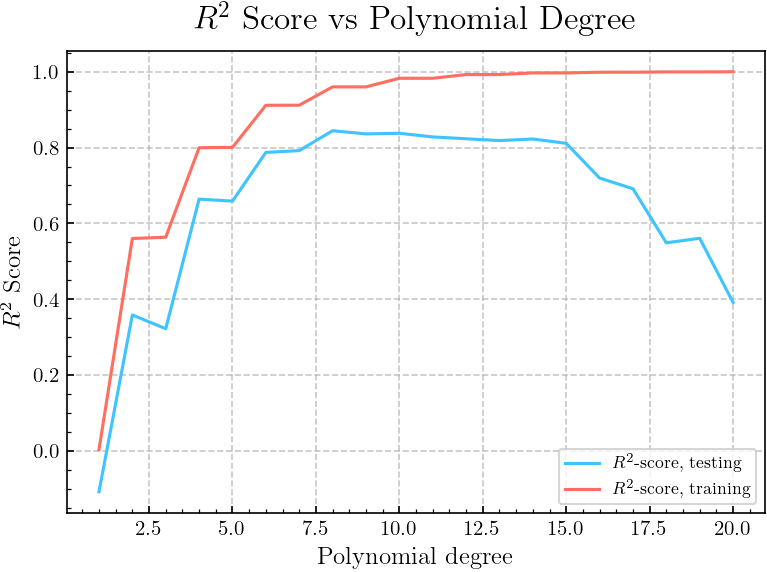

'\n# Train MSE\nplt.figure()\nplt.plot(degrees, MSE_train, label="MSE on training data", color=\'#A10000\', linewidth=1.5)\nplt.title("Train MSE vs Polynomial Degree", fontsize=16, fontfamily=\'sans-serif\', pad=10)\nplt.xlabel("Polynomial degree", fontsize=12, fontfamily=\'sans-serif\')\nplt.ylabel("MSE", fontsize=12, fontfamily=\'sans-serif\')\nplt.legend(fontsize=8)\nfig = plt.gcf()\nfig.set_size_inches(6, 4)   # <- force size here\nplt.grid(True, linestyle=\'--\', alpha=0.7)\nplt.savefig("Plots/mse_train_vs_degree.pdf", bbox_inches="tight")\nplt.show()\n'

In [3]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Define maximal polynomial degree
deg_max = 20

# Define empty lists/arrays for storing MSEs, R2-scores and parameters
MSE=[]
MSE_train=[]
R2_score= []
R2_score_train=[]
# parameters = np.zeros((deg_max, deg_max))
parameters = np.full((deg_max, deg_max), np.nan, dtype=float)

# Degrees you want to show in regression plot
plot_degrees = [1, 5, 10, 15, 20]

# Loop over ALL degrees
for p in range(1, deg_max+1):
    # Feature matrix for plotting/predicting
    X_plot = polynomial_features(x, p, intercept=False)
    # Feature matrix for training
    X_train = polynomial_features(x_train, p, intercept=False)
    # Feature matrix for testing
    X_test  = polynomial_features(x_test, p, intercept=False)

    # Scaling data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute closed-form OLS parameters
    beta = OLS_parameters(X_train_s, y_train)

    # Store parameters in array
    for i in range (len(beta)):
        parameters[p-1, i] = beta[i]
    
    # Compute y_offset (because Intercept = False)
    y_offset = np.mean(y_train)
    # Add offset to prediction, predict on test data
    y_pred = X_test_s @ beta + y_offset
    y_pred_train = X_train_s @ beta + y_offset
    # Add MSE to list, predicted on test data
    MSE.append(mean_squared_error(y_test, y_pred))
    MSE_train.append(mean_squared_error(y_train, y_pred_train))
    # Add R2-score to list
    R2_score.append(r2_score(y_true=y_test, y_pred=y_pred))
    R2_score_train.append(r2_score(y_true=y_train, y_pred=y_pred_train))

    # Plot only for selected degrees
    if p in plot_degrees:
        plt.plot(x, y)
        plt.plot(x, X_plot_s @ beta + y_offset, label=f"Degree: {p}")

# --- Add Runge function curve on top ---
x_dense = np.linspace(-1, 1, 500)
y_runge = 1 / (1 + 25 * x_dense**2)
plt.plot(x_dense, y_runge, color="black", linewidth=1, label="Runge function")

# Save the (already-drawn) fits plot
plt.title("OLS Regression Runge Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6, 4)   # <- force size here
plt.savefig("Plots/ols_regression.pdf", bbox_inches="tight")
plt.show()


# Common x for metric plots
degrees = np.arange(1, deg_max+1)

# Test and Train MSE in same plot
plt.figure()
plt.plot(degrees, MSE, label="Test MSE", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_train, label="Train MSE", color='#FF6F61', linewidth=1.5)
plt.title("MSE vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("MSE", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/mse_test_train_vs_degree.pdf", bbox_inches="tight")
plt.show()

"""
# Test MSE
plt.figure()
plt.plot(degrees, MSE, label="MSE", color='#FF6F61', linewidth=1.5)
plt.title("Test MSE vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("MSE", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
fig = plt.gcf()
fig.set_size_inches(6, 4)   # <- force size here
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Plots/mse_test_vs_degree.pdf", bbox_inches="tight")
plt.show()
"""

# R^2 (test)
plt.figure()
plt.plot(degrees, R2_score, label="$R^2$-score, testing", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, R2_score_train, label="$R^2$-score, training", color='#FF6F61', linewidth=1.5)
plt.title("$R^2$ Score vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("$R^2$ Score", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
fig = plt.gcf()
fig.set_size_inches(6, 4)   # <- force size here
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Plots/r2_test_train_vs_degree.pdf", bbox_inches="tight")
plt.show()

"""
# Train MSE
plt.figure()
plt.plot(degrees, MSE_train, label="MSE on training data", color='#A10000', linewidth=1.5)
plt.title("Train MSE vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("MSE", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
fig = plt.gcf()
fig.set_size_inches(6, 4)   # <- force size here
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Plots/mse_train_vs_degree.pdf", bbox_inches="tight")
plt.show()
"""


## Extracting optimal degree with regards to MSE

In [4]:
min_MSE = np.min(MSE)
optimal_degree = np.argmin(MSE) + 1
print(f"The optimal polynomial degree is p={optimal_degree}, with MSE={np.round(min_MSE, 4)}")


The optimal polynomial degree is p=8, with MSE=0.0106


## Extracting optimal degree with regards to R2-score

In [5]:
max_R2 = np.max(R2_score)
optimal_degree = np.argmax(R2_score) + 1
print(f"The optimal polynomial degree is p={optimal_degree}, with R2-score={np.round(max_R2, 4)}")



The optimal polynomial degree is p=8, with R2-score=0.8444


## Plotting parameters

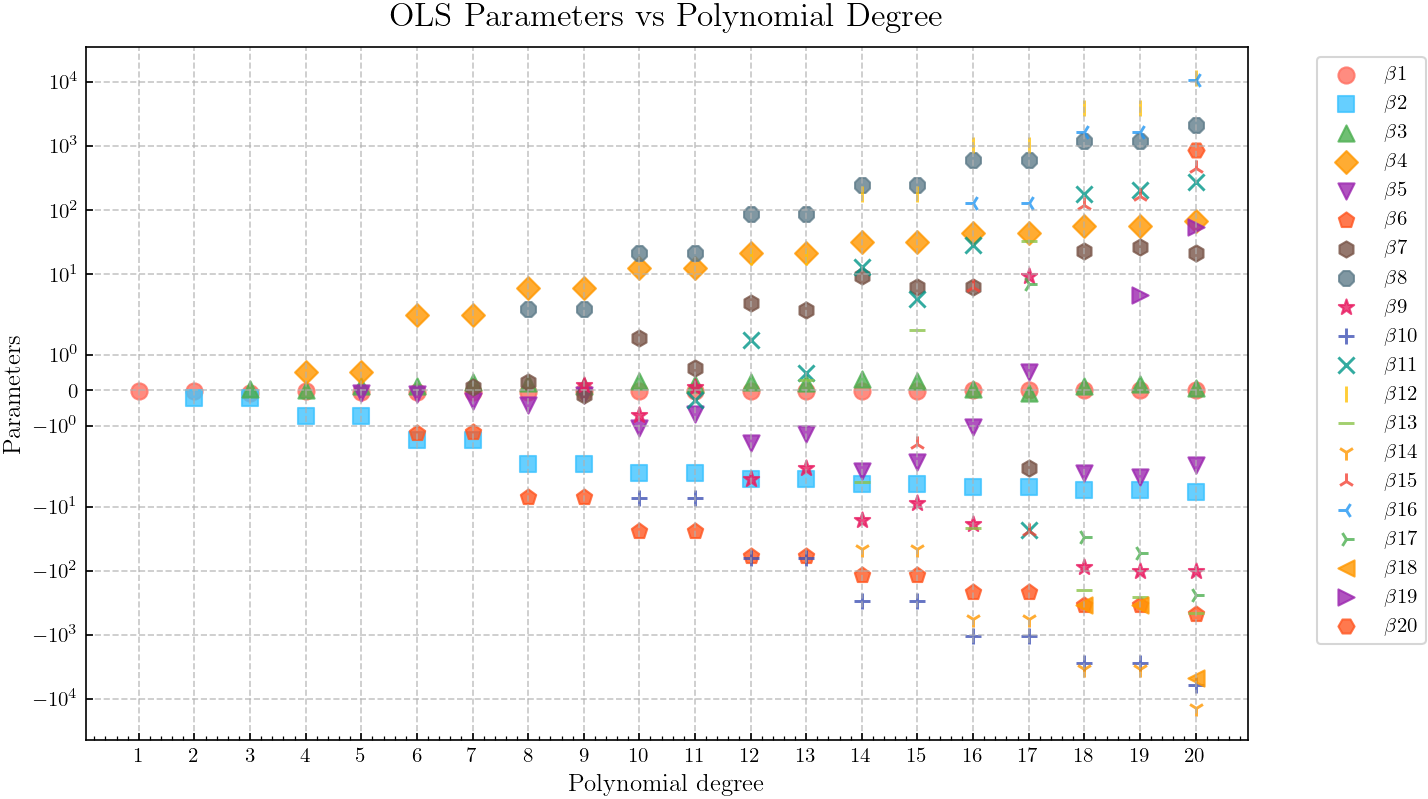

In [6]:
# Parameters by degree (corrected version with shapes and legend)
plt.figure()
markers = ['o', 's', '^', 'D', 'v', 'p', 'h', '8', '*', '+', 'x', '|', '_', '1', '2', '3', '4', '<', '>', 'H', 'X', 'P', 'D', 'o', 's']  # More shapes for higher degrees
colors = ['#FF6F61', '#40C4FF', '#4CAF50', '#FF9800', '#9C27B0', '#FF5722', '#795548', '#607D8B', '#E91E63', '#3F51B5', '#009688', '#FFC107', '#8BC34A', '#FF9800', '#F44336', '#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#FF5722', '#795548', '#607D8B', '#E91E63', '#3F51B5', '#009688']  # More colors

# Degrees to show
plot_degrees = list(range(1, 21))  # Show all degrees from 1 to 20

# Track which parameters we've already added to legend
legend_added = set()

# Plot parameters correctly: for each degree, plot only the parameters that exist
for degree in plot_degrees:
    if degree <= deg_max:  # Make sure we don't exceed our data
        degree_params = parameters[degree-1, :degree]  # Get only the valid parameters for this degree
        degree_x = np.full(degree, degree)  # x-coordinates (all at the same degree)
        degree_y = degree_params  # y-coordinates (the parameter values)
        
        # Plot each parameter for this degree
        for i in range(degree):
            # Only add to legend if we haven't seen this parameter before
            label = rf'$\beta ${i+1}' if i not in legend_added else ""
            if label:
                legend_added.add(i)
            
            plt.scatter(degree_x[i], degree_y[i], 
                       marker=markers[i % len(markers)],
                       color=colors[i % len(colors)], 
                       s=60, alpha=0.8, label=label)

plt.title("OLS Parameters vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("Parameters", fontsize=12, fontfamily='sans-serif')
plt.yscale('symlog')  # Set y-axis to log scale

# Set x-axis ticks to show every whole number
plt.xticks(range(1, max(plot_degrees) + 1))

plt.grid(True, linestyle='--', alpha=0.7)

# Add legend to the right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

fig = plt.gcf()
fig.set_size_inches(10, 6)   # <- increased size to accommodate more data and legend
plt.savefig("Plots/ols_parameters_by_degree.pdf", bbox_inches="tight")
plt.show()


## MSE with noisy target data

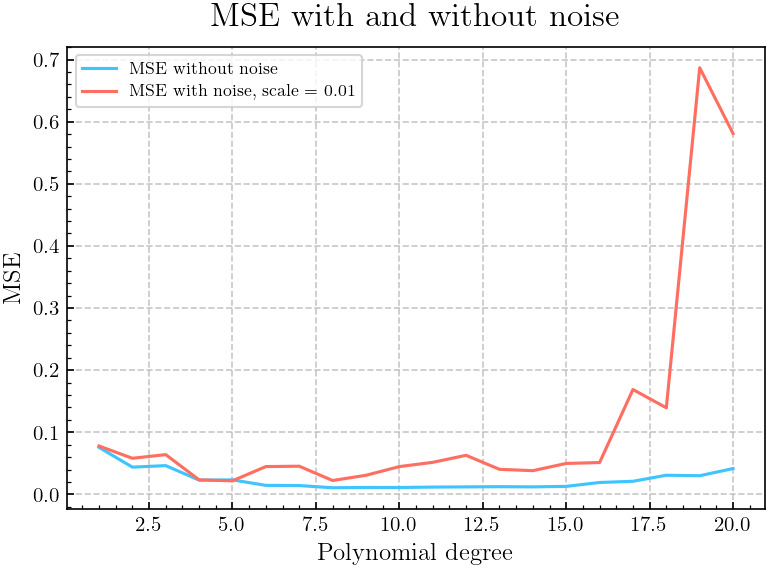

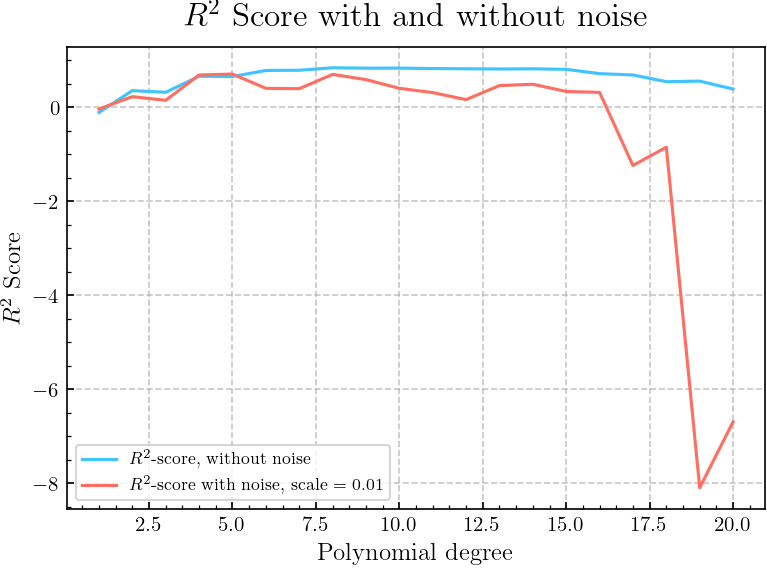

In [21]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100, noise_scale=0.1)
x_train_noisy, x_test_noisy, y_train_noisy, y_test_noisy = train_test_split(x, y_noisy, test_size=0.2, random_state=6114)

# Define maximal polynomial degree
deg_max = 20

# Define empty lists/arrays for storing MSEs, R2-scores and parameters

MSE_noisy=[]
R2_score_noisy=[]

# Degrees you want to show in regression plot
plot_degrees = [1, 5, 10, 15, 20]

# Loop over ALL degrees
for p in range(1, deg_max+1):
    # Feature matrix for plotting/predicting
    X_plot = polynomial_features(x, p, intercept=False)
    # Feature matrix for training
    X_train = polynomial_features(x_train_noisy, p, intercept=False)
    # Feature matrix for testing
    X_test  = polynomial_features(x_test_noisy, p, intercept=False)

    # Scaling data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute closed-form OLS parameters
    beta_noisy = OLS_parameters(X_train_s, y_train_noisy)
    
    # Compute y_offset (because Intercept = False)
    y_offset = np.mean(y_train_noisy)
    # Add offset to prediction, predict on test data
    y_pred = X_test_s @ beta_noisy + y_offset
    # Add MSE to list, predicted on test data
    MSE_noisy.append(mean_squared_error(y_test_noisy, y_pred))
    # Add R2-score to list
    R2_score_noisy.append(r2_score(y_true=y_test_noisy, y_pred=y_pred))




# Common x for metric plots
degrees = np.arange(1, deg_max+1)

# Test and Train MSE in same plot
plt.figure()
plt.plot(degrees, MSE, label="MSE without noise", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_noisy, label="MSE with noise, scale = 0.01", color='#FF6F61', linewidth=1.5)
plt.title("MSE with and without noise", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("MSE", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/mse_with_noise_vs_degree.pdf", bbox_inches="tight")
plt.show()



# R^2 (test)
plt.figure()
plt.plot(degrees, R2_score, label="$R^2$-score, without noise", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, R2_score_noisy, label="$R^2$-score with noise, scale = 0.01", color='#FF6F61', linewidth=1.5)
plt.title("$R^2$ Score with and without noise", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("$R^2$ Score", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
fig = plt.gcf()
fig.set_size_inches(6, 4)   # <- force size here
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Plots/r2_with_noise.pdf", bbox_inches="tight")
plt.show()


